In [1]:
import numpy as np
from numpy import random as rd
import matplotlib.pyplot as plt

In [2]:
ub = [1000, 1000]
lb = [-1000, -1000]
best = []

In [3]:
class Wolf:
    def __init__(self, dvar=[]):
        if (len(dvar)!=0):
            self.dvar = dvar
        else:
            self.dvar = rd.random(2)*800-400
        self.fitness = 0
    
    def calc_fitness(self):
        # self.fitness = self.dvar[0]**2 - 10*np.cos(2*np.pi*self.dvar[0]) + self.dvar[1]**2 -10*np.cos(2*np.pi*self.dvar[1])
        # this.fitness = Math.pow(this.position.x,2) - 10*Math.cos(2*Math.PI * this.position.x) + Math.pow(this.position.y,2) - 10*Math.cos(2*Math.PI*this.position.y)
        x = self.dvar[0]
        y = self.dvar[1]
        self.fitness = (0.002*(x-50)**2 - 100 * np.cos(0.02 * np.pi * (x-50))) + (0.002*(y-50)**2 - 100 * np.cos(0.02 * np.pi * (y-50))) + 200


In [4]:
#init
pop_size = 100
population = []
alpha = Wolf()
beta  = Wolf()
gamma = Wolf()
alpha.calc_fitness()
beta.calc_fitness()
gamma.calc_fitness()

for i in range(pop_size):
    population.append(Wolf())
    population[i].calc_fitness()
    # print(population[i].fitness)
    if population[i].fitness<alpha.fitness:
        alpha, population[i] = population[i], alpha
    elif population[i].fitness<beta.fitness:
        beta, population[i] = population[i], beta
    elif population[i].fitness<gamma.fitness:
        gamma, population[i] = population[i], gamma

print('alpha:', alpha.fitness)
print('beta: ', beta.fitness)
print('gamma:', gamma.fitness)

alpha: 103.41170485345478
beta:  127.85473687920664
gamma: 195.39219933224985


In [5]:
a = 2
max_iter = 100
da = (a)/max_iter

it = 1
while it<=2*max_iter:
    print("Iteration", it)
    print("Best:", alpha.dvar)
    best.append(alpha.fitness)
    new_alpha = alpha
    new_beta = beta
    new_gamma = gamma
    for i in range(pop_size):
        A1 = a * (2 * rd.random() - 1)
        A2 = a * (2 * rd.random() - 1)
        A3 = a * (2 * rd.random() - 1)
        C1, C2, C3 = 2 * rd.random(), 2*rd.random(), 2*rd.random()
        X1 = alpha.dvar - A1 * abs(C1 * alpha.dvar-population[i].dvar)
        X2 = beta.dvar - A3 * abs(C2 * beta.dvar-population[i].dvar)
        X3 = gamma.dvar - A3 * abs(C3 * gamma.dvar-population[i].dvar)
        population[i].dvar = (X1+X2+X3)/3
        population[i].calc_fitness()
        if population[i].fitness < new_alpha.fitness:
            new_alpha, population[i] = population[i], new_alpha
        elif population[i].fitness < new_beta.fitness:
            new_beta, population[i] = population[i], new_beta
        elif population[i].fitness < new_gamma.fitness:
            new_gamma, population[i] = population[i], new_gamma
    alpha = new_alpha
    beta = new_beta
    gamma = new_gamma
    a = a-da
    it+=1



Iteration 1
Best: [-67.38940169 -52.21935416]
Iteration 2
Best: [51.05224291 46.58056688]
Iteration 3
Best: [51.05224291 46.58056688]
Iteration 4
Best: [51.05224291 46.58056688]
Iteration 5
Best: [50.80160396 47.78123738]
Iteration 6
Best: [50.56841452 51.26583936]
Iteration 7
Best: [50.56841452 51.26583936]
Iteration 8
Best: [50.46653992 49.92810409]
Iteration 9
Best: [50.46653992 49.92810409]
Iteration 10
Best: [50.22201503 49.80126254]
Iteration 11
Best: [50.24339084 49.86632271]
Iteration 12
Best: [50.24339084 49.86632271]
Iteration 13
Best: [50.24339084 49.86632271]
Iteration 14
Best: [50.18585981 49.82127884]
Iteration 15
Best: [50.18585981 49.82127884]
Iteration 16
Best: [50.18585981 49.82127884]
Iteration 17
Best: [50.06481457 49.75316379]
Iteration 18
Best: [50.06481457 49.75316379]
Iteration 19
Best: [50.06481457 49.75316379]
Iteration 20
Best: [50.06481457 49.75316379]
Iteration 21
Best: [50.07155417 49.76196976]
Iteration 22
Best: [50.07155417 49.76196976]
Iteration 23
Best

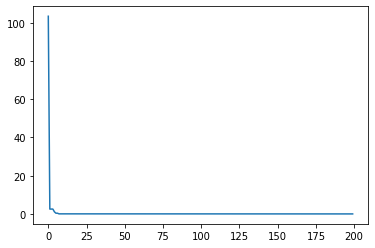

In [6]:
plt.plot(best)
plt.show()